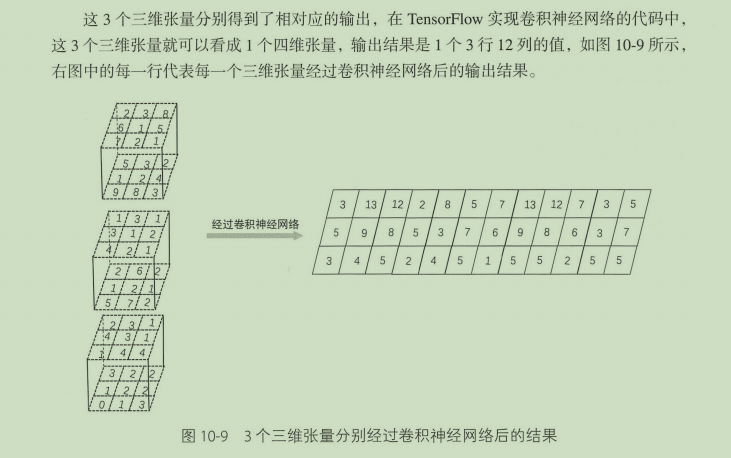

In [4]:
import tensorflow as tf
import numpy as np
#输入张量
input_tensor=tf.placeholder(tf.float32,[None,3,3,2])

# 3个高为2, 宽为2, 深度为2的卷积核
kernel=tf.constant([
    [ [[-1,1,0], [1,-1,-1]]  , [[0,0,-1], [0,0,0]] ],
    [ [[0,0,0], [0,0,1]]  , [[1,-1,1], [-1,1,0]] ]
],tf.float32)
#卷积
conv2d=tf.nn.conv2d(input_tensor,kernel,(1,1,1,1), 'SAME')

#偏置
bias=tf.constant([1,2,3],tf.float32)
conv2d_add_bias=tf.add(conv2d,bias)

#激活函数
active=tf.nn.relu(conv2d_add_bias)


#pool操作
active_maxPool=tf.nn.max_pool(active,(1,2,2,1),(1,1,1,1),'VALID')

#拉伸
shape=active_maxPool.get_shape()
num=shape[1].value*shape[2].value*shape[3].value
flatten=tf.reshape(active_maxPool,[-1, num])
#打印结果
session=tf.Session()
print(session.run(flatten,feed_dict={
    input_tensor:np.array([
        #第1个3行3列2深度的三维张量
        [
            [[2,5],[3,3],[8,2]],
            [[6,1],[1,2],[5,4]],
            [[7,9],[2,8],[1,3]],
        ],
        #第2个3行3列2深度的三维张量
        [
            [[1,2],[3,6],[1,2]],
            [[3,1],[1,2],[2,1]],
            [[4,5],[2,7],[1,2]],
        ],
        #第1个3行3列2深度的三维张量
        [
            [[2,3],[3,2],[1,2]],
            [[4,1],[3,2],[1,2]],
            [[1,0],[4,1],[4,3]],
        ]
    ])
}))


[[ 3. 13. 12.  2.  8.  5.  7. 13. 12.  7.  3.  5.]
 [ 5.  9.  8.  5.  3.  7.  6.  9.  8.  6.  3.  7.]
 [ 3.  4.  5.  2.  4.  5.  1.  5.  5.  2.  5.  5.]]
